In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

(250, 250)
0.04295058823529362
0.9228158117647087


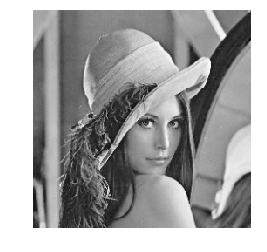

In [3]:
# Load image
LENA = imread('Lena-grayscale.jpg')
LENA = resize(LENA, (250, 250), anti_aliasing=True)
print(LENA.shape)
print(LENA.min())
print(LENA.max())
plt.imshow(LENA, cmap='gray')
plt.axis('off')
plt.show()

Threshold: 0.7038921788235322
(250, 250)


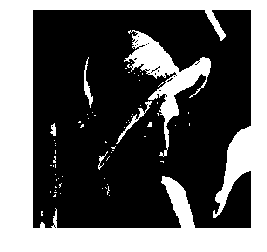

In [4]:
# Create mask
thresh = 0.8 * (LENA.max() - LENA.min())
print(f"Threshold: {thresh}")
bool_mask = LENA >= thresh
print(bool_mask.shape)
plt.imshow(bool_mask, cmap='gray')
plt.axis('off')
plt.show()

0.0
0.9228158117647087


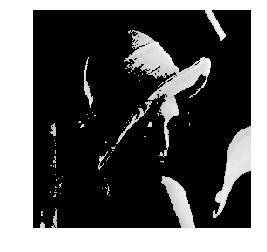

In [5]:
# Match (high-pass filter)
match_lena = np.zeros_like(LENA)
match_lena[bool_mask] = LENA[bool_mask]
print(match_lena.min())
print(match_lena.max())
plt.imshow(match_lena, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
# They are different
print((LENA - match_lena).sum())

24369.103059074507


In [7]:
# Normalize kernel size
def norm_size_kernel(k):
    if k.shape[0] % 2 == 0:
        k = np.concatenate((k, np.zeros((1, k.shape[1]))), axis=0)
    if k.shape[1] % 2 == 0:
        k = np.concatenate((k, np.zeros((k.shape[0], 1))), axis=1)
    return(k)

In [8]:
# Define a convolution function
def convolve_img(I, K):
    # Validate kernel size and flip it
    K = norm_size_kernel(K)
    K = np.flipud(K)
    K = np.fliplr(K)
    # Check for padding size
    K_v, K_h = K.shape
    pad_v = int((K_v - 1) / 2)
    pad_h = int((K_h - 1) / 2)
    # Inscribe image with padding border
    Id = np.zeros((I.shape[0] + 2 * pad_v, I.shape[1] + 2 * pad_h))
    Id[pad_v:-pad_v, pad_h:-pad_h] = I
    # Loop
    Od = np.zeros_like(Id)
    for it_v in range(pad_v, Id.shape[0]-pad_v):
        for it_h in range(pad_h, Id.shape[1]-pad_h):
            Od[it_v, it_h] = (Id[it_v-pad_v:it_v+pad_v+1, it_h-pad_h:it_h+pad_h+1] * K).sum()
    # Return
    O = Od[pad_v:Id.shape[0]-pad_v, pad_h:Id.shape[1]-pad_h]
    return(O)

(250, 250)


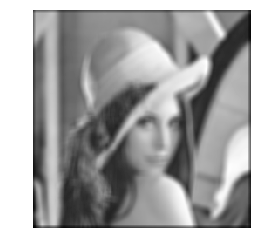

0.443275726361656
6.053300482788676


In [9]:
# Create an average kernel and apply it to an image
K = 1/9 * np.ones((8, 8))
O = convolve_img(LENA, K)
print(O.shape)
plt.imshow(O, cmap='gray')
plt.axis('off')
plt.show()
print(O.min())
print(O.max())

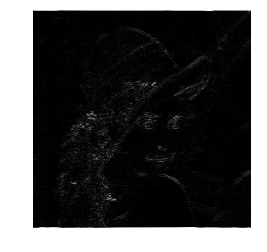

0.0
2.566130447058823


In [10]:
# Horizontal line
KL = np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]])
O = np.abs(convolve_img(LENA, KL))
plt.imshow(O, cmap='gray')
plt.axis('off')
plt.show()
print(O.min())
print(O.max())

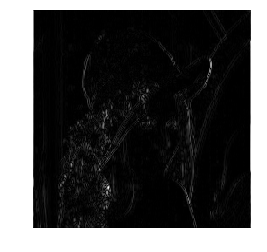

0.0
3.7102807843137566


In [11]:
# Horizontal line
O = np.abs(convolve_img(LENA, KL.T))
plt.imshow(O, cmap='gray')
plt.axis('off')
plt.show()
print(O.min())
print(O.max())

In [12]:
# Gaussina kernel
KGauss = (1/256) * np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]])
print(KGauss)

[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


0.04295058823529362
0.9228158117647087
0.08232834019607814
0.8869195029411765


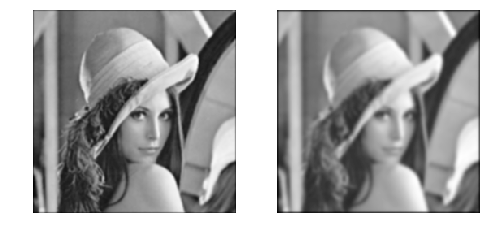

0.03568386353497796
0.8467000685725972


In [13]:
# Gaussian kernel
print(LENA.min())
print(LENA.max())
O = convolve_img(LENA, KGauss)
print(O.min())
print(O.max())
# Show
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 12))
ax1.imshow(O, cmap='gray')
ax1.axis('off')
# Three more times
for _ in range(3):
    O = convolve_img(O, KGauss)
# Show
ax2.imshow(O, cmap='gray')
ax2.axis('off')
plt.show()
print(O.min())
print(O.max())

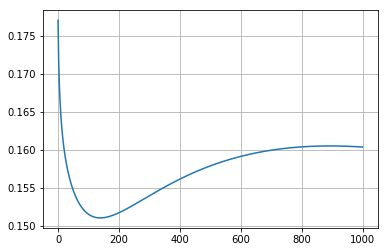

In [16]:
# Smooth Lena out
num_inter = 1000
std_dev = np.zeros((num_inter, 1))

O = LENA.copy()
for it_dev in range(num_inter):
    O = convolve_img(O, KGauss)
    std_dev[it_dev] = O.std()
    
plt.plot(std_dev)
plt.grid()
plt.show()

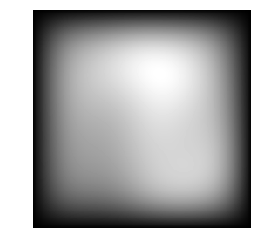

0.00034475179694033525
0.5788498727677113


In [17]:
# Show Lena smoothed out
plt.imshow(O, cmap='gray')
plt.axis('off')
plt.show()
print(O.min())
print(O.max())

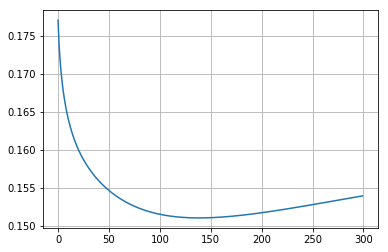

In [19]:
# Smooth Lena out (consider only magnitude)
num_inter = 300
std_dev = np.zeros((num_inter, 1))

O = LENA.copy()
for it_dev in range(num_inter):
    O = np.abs(convolve_img(O, KGauss))
    std_dev[it_dev] = O.std()
    
plt.plot(std_dev)
plt.grid()
plt.show()

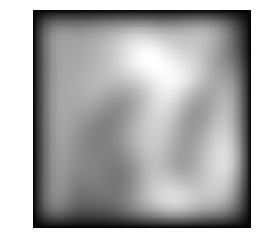

0.0010906945228136883
0.6822487217247231


In [20]:
# Show Lena smoothed out
plt.imshow(O, cmap='gray')
plt.axis('off')
plt.show()
print(O.min())
print(O.max())

0.0
2.566130447058823


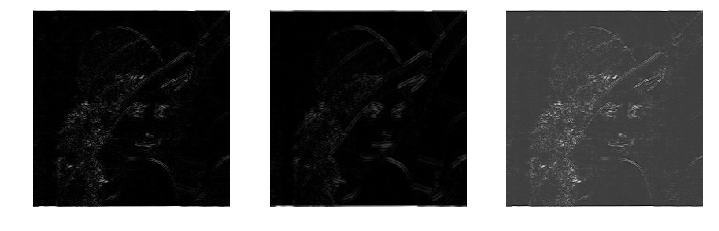

6.436274512244822e-07
1.1106386083333342


In [14]:
# Combine kernels
OGauss = np.abs(convolve_img(LENA, KGauss))
OGL = np.abs(convolve_img(OGauss, KL))

OL = np.abs(convolve_img(LENA, KL))
print(OL.min())
print(OL.max())

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 15))
ax1.imshow(OL, cmap='gray')
ax1.axis('off')
ax2.imshow(OGL, cmap='gray')
ax2.axis('off')
ax3.imshow(OL - OGL, cmap='gray')
ax3.axis('off')
plt.show()

print(OGL.min())
print(OGL.max())

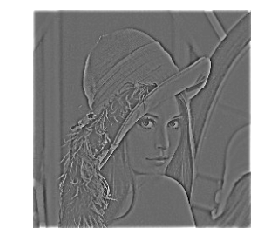

-0.3943285534877986
0.5506594883607254


In [15]:
# Apply it 4 times and substract from original
O = LENA.copy()
for _ in range(4):
    O = convolve_img(O, KGauss)

plt.imshow(LENA - O, cmap='gray')
plt.axis('off')
plt.show()

print((LENA - O).min())
print((LENA - O).max())